In [1]:
import numpy as np
from scipy import stats
from matplotlib import pyplot as plt

### 0. Setup 
Let's generate 500 coin tosses from a [Bernoulli distribution](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.bernoulli.html?highlight=bernoulli#scipy.stats.bernoulli):

In [2]:
p = 0.5
n_draws = 1000
data = stats.bernoulli.rvs(p, size=n_draws)

### 1. Explore the data
Explore the data by calculating its [empirical mean](https://numpy.org/doc/stable/reference/generated/numpy.mean.html) and its [empirical  variance](https://numpy.org/doc/stable/reference/generated/numpy.var.html). Look up, how mean and variance of a [Bernoulli distribution](https://en.wikipedia.org/wiki/Bernoulli_distribution) are defined. What do you notice?

In [3]:
np.mean(data), np.var(data)

(0.498, 0.2499959999999999)

In [8]:
p, p * (1 - p)

(0.5, 0.25)

### 2. Code a plot function
Fill out the function `plot_coin_toss` that computes the *posterior distribution* given a number of coin tosses as *data*. By choosing a suitable prior and doing some fancy math, we know that the posterior in this case is a *beta distribution* with $a = 1 + n_\text{heads}, \, b = 1 + n_\text{trials} - n_\text{heads}$.

**2.1** Take the first $n_\text{trials}$ draws from data and compute the number of heads.

**2.2** Use the PDF (probability density function) of the [beta distribution](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.beta.html#scipy.stats.beta), to compute the posterior distribution for every point in `x`.

In [5]:
def plot_coin_toss(n_trials, data):
    n_heads = data[:n_trials].sum()

    x = np.linspace(0, 1, 1000)
    posterior_pdf = stats.beta.pdf(x, 1 + n_heads, 1 + n_trials - n_heads)
    
    plt.title("%s trials, %s heads" % (n_trials, n_heads))
    plt.xlabel("$P(H)$, Probability of Heads")
    plt.ylabel("Density")
    plt.plot(x, posterior_pdf, label="observe %d tosses,\n %d heads" % (n_trials, n_heads))
    plt.fill_between(x, 0, posterior_pdf, color="#aaaadd", alpha=0.5)
    plt.xlim((0., 1.))
    plt.ylim((0., 30.))
    plt.show()

### 3. Run multiple trials
Execute the coin toss function for multiple number of trials (e.g. 0, 2, 10, 20, 50, 500). Is the result sensible? Describe what you see and what this means for the estimation.

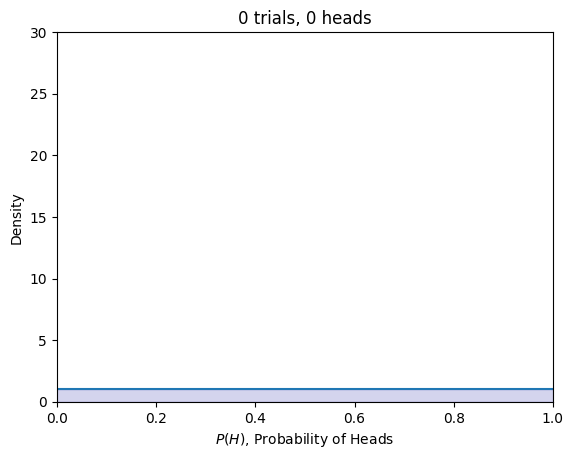

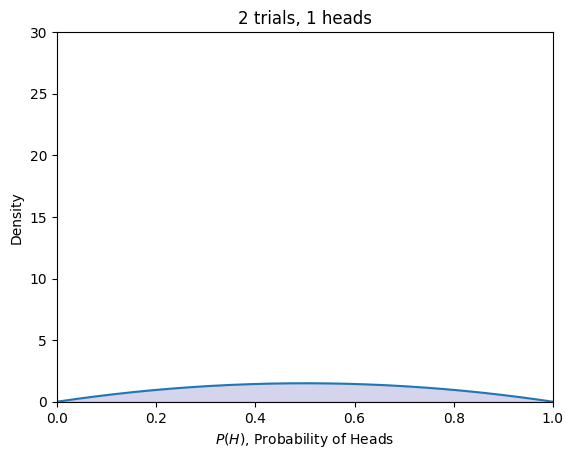

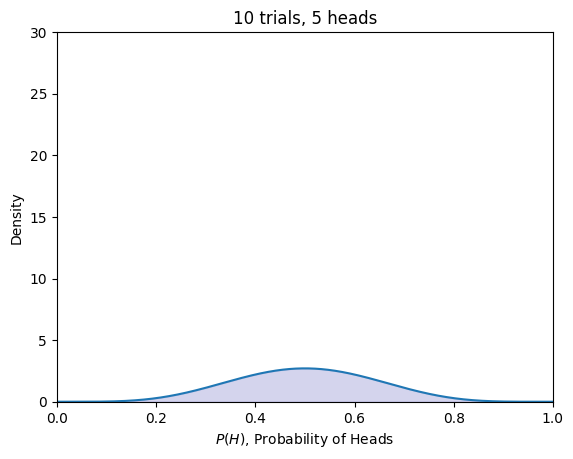

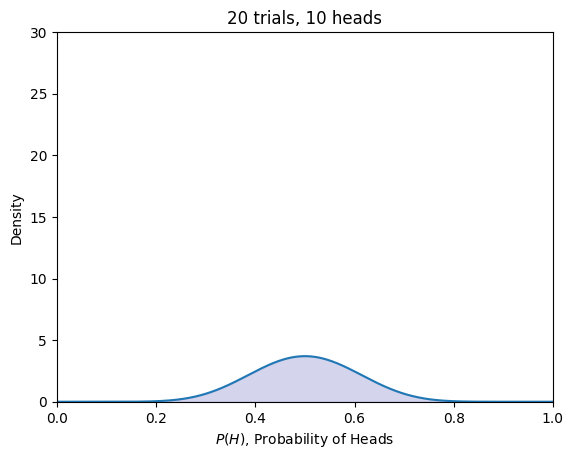

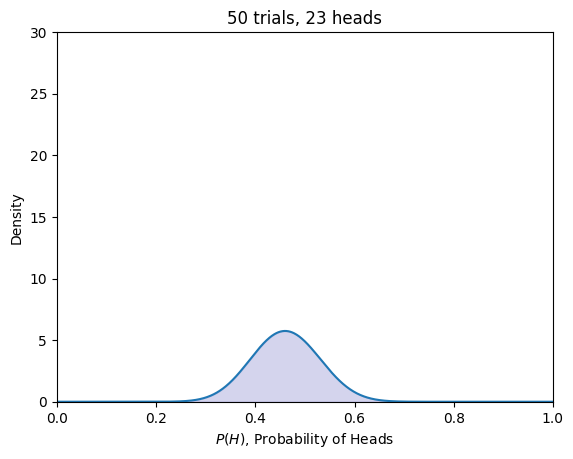

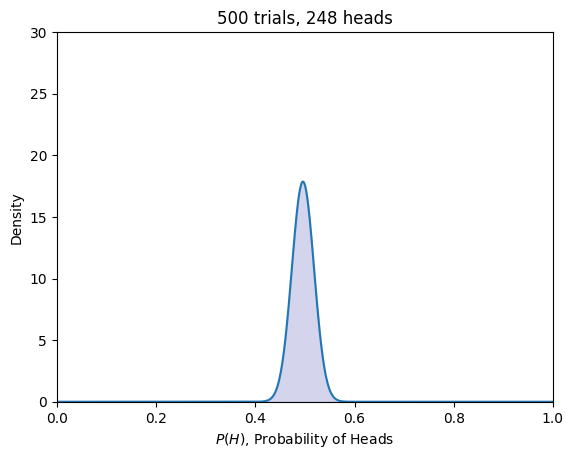

In [6]:
for n in [0, 2, 10, 20, 50, 500]:
    plot_coin_toss(n, data)

**6.** Use [this](https://towardsdatascience.com/bring-your-jupyter-notebook-to-life-with-interactive-widgets-bc12e03f0916) tutorial to build an jupyter notebook application with two sliders that resemble $p$ and $n_\text{trials}$. Set $n_\text{draws}$ to a higher value. Have fun!

In [7]:
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
import matplotlib.pyplot as plt, random

def interactive_plot(n_trials, p):
    data = stats.bernoulli.rvs(p, size=2000)
    plot_coin_toss(n_trials, data)
    return
interact(interactive_plot, n_trials=(1,2000, 10), p=(0., 1., 0.05));

interactive(children=(IntSlider(value=991, description='n_trials', max=2000, min=1, step=10), FloatSlider(valu…